In [159]:
import os
import random
import time
from tqdm import tqdm
import albumentations as A
from PIL import Image, ImageDraw

In [138]:
# test_anno_path = "/workspace/traffic_light/data/detection/train/labels"
test_anno_dir = "/workspace/traffic_light/Result/detect/predictions/v1"
image_dir = "/workspace/traffic_light/data/detection/train/images"

In [150]:
import numpy as np
import random
random.seed(7)
target_path = "/workspace/traffic_light/data/detection/test/images/10006398.jpg"
target_image = np.array(Image.open(target_path))
target_image = np.full_like(target_image,10)

transform = A.Compose([
    A.FDA([target_image], p=1, read_fn=lambda x: x),
    # A.RandomBrightnessContrast(brightness_limit=(0.1, -0.1), contrast_limit=(0.1, 0.1), p=1.0),  # 밝기 낮추고 대비 높이기
    A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=(-10, -10), val_shift_limit=(-10, -10), p=1.0),  # 채도 및 명도 낮추기
    A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=-10, p=1.0),  # 빨간색과 녹색 강조, 파란색 감소
    A.GaussianBlur(blur_limit=(3, 5), p=0.1),  # 블러 효과 추가
    
])#, bbox_params=A.BboxParams(format='coco'))

images = [ im for im in os.listdir(image_dir) if os.path.splitext(im)[1] == '.jpg']
num_elements = int(len(images)*0.05)
print(num_elements)
random_images = sorted(random.sample(images, num_elements))
print(random_images)
for image in tqdm(random_images):
    name =os.path.splitext(image)[0]
    output_path = f"/workspace/traffic_light/data/detection/aug/5{name[1:]}.jpg"

    img_path = os.path.join(image_dir, f'{name}.jpg')
    # img_path = "/workspace/traffic_light/data/detection/train/images/00006280.jpg"
    img = np.array(Image.open(img_path))

    aug = transform(image=img)['image']
    time.sleep(0.5)
    transformed_img = Image.fromarray(aug)    
    transformed_img.save(output_path)
    

# transformed_img.show()
# print(aug)

1208
['00000056.jpg', '00000057.jpg', '00000076.jpg', '00000081.jpg', '00000082.jpg', '00000088.jpg', '00000094.jpg', '00000099.jpg', '00000104.jpg', '00000110.jpg', '00000116.jpg', '00000123.jpg', '00000159.jpg', '00000215.jpg', '00000235.jpg', '00000237.jpg', '00000312.jpg', '00000345.jpg', '00000371.jpg', '00000434.jpg', '00000463.jpg', '00000473.jpg', '00000481.jpg', '00000490.jpg', '00000511.jpg', '00000515.jpg', '00000527.jpg', '00000546.jpg', '00000547.jpg', '00000589.jpg', '00000607.jpg', '00000624.jpg', '00000625.jpg', '00000658.jpg', '00000669.jpg', '00000679.jpg', '00000689.jpg', '00000709.jpg', '00000717.jpg', '00000731.jpg', '00000749.jpg', '00000777.jpg', '00000784.jpg', '00000786.jpg', '00001119.jpg', '00001141.jpg', '00001159.jpg', '00001173.jpg', '00001177.jpg', '00001182.jpg', '00001201.jpg', '00001234.jpg', '00001258.jpg', '00001321.jpg', '00001335.jpg', '00001360.jpg', '00001361.jpg', '00001363.jpg', '00001373.jpg', '00001388.jpg', '00001419.jpg', '00001434.jpg', '0

  3%|▎         | 33/1208 [00:48<29:04,  1.48s/it]


KeyboardInterrupt: 

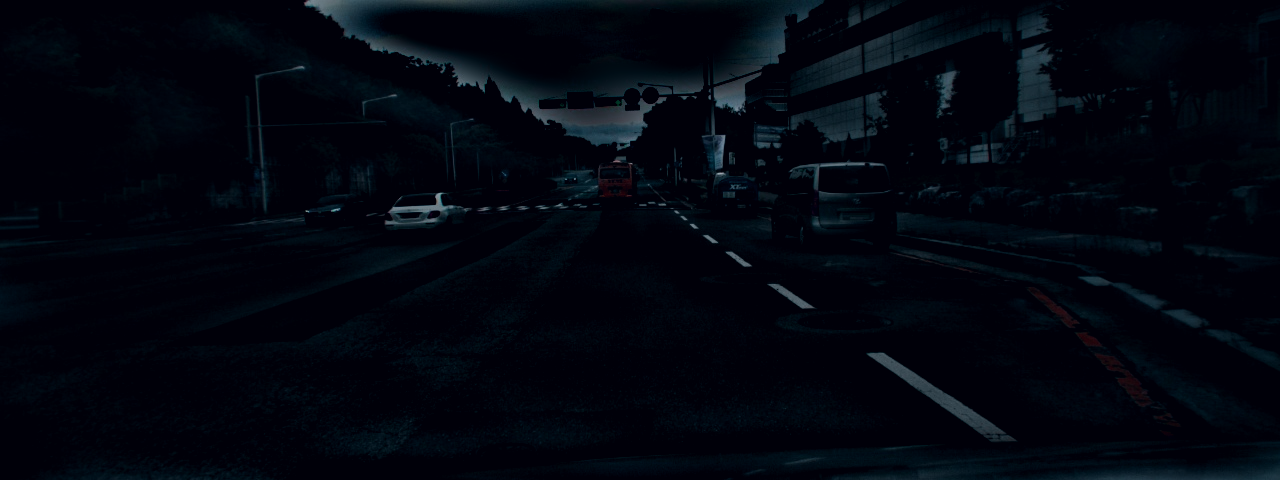

In [158]:
import numpy as np
import random
random.seed(7)
target_path = "/workspace/traffic_light/data/detection/test/images/10006398.jpg"
target_image = np.array(Image.open(target_path))
target_image = np.full_like(target_image,10)

transform = A.Compose([
    A.FDA([target_image], p=1, read_fn=lambda x: x),
    # A.RandomBrightnessContrast(brightness_limit=(0.1, -0.1), contrast_limit=(0.1, 0.1), p=1.0),  # 밝기 낮추고 대비 높이기
    A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=(-10, -10), val_shift_limit=(-10, -10), p=1.0),  # 채도 및 명도 낮추기
    A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=-10, p=1.0),  # 빨간색과 녹색 강조, 파란색 감소
    A.GaussianBlur(blur_limit=(3, 5), p=0.1),  # 블러 효과 추가
    
])#, bbox_params=A.BboxParams(format='coco'))

    
img_path = "/workspace/traffic_light/data/detection/train/images/00000237.jpg"
img = np.array(Image.open(img_path))

aug = transform(image=img)['image']
transformed_img = Image.fromarray(aug)    

transformed_img.show()
# print(aug)

In [3]:
categories = categories = [
    {"id": 0, "name": "veh_go", "supercategory": "veh_go"},
    {"id": 1, "name": "veh_goLeft", "supercategory": "veh_goLeft"},
    {"id": 2, "name": "veh_noSign", "supercategory": "veh_noSign"},
    {"id": 3, "name": "veh_stop", "supercategory": "veh_stop"},
    {"id": 4, "name": "veh_stopLeft", "supercategory": "veh_stopLeft"},
    {"id": 5, "name": "veh_stopWarning", "supercategory": "veh_stopWarning"},
    {"id": 6, "name": "veh_warning", "supercategory": "veh_warning"},
    {"id": 7, "name": "ped_go", "supercategory": "ped_go"},
    {"id": 8, "name": "ped_noSign", "supercategory": "ped_noSign"},
    {"id": 9, "name": "ped_stop", "supercategory": "ped_stop"},
    {"id": 10, "name": "bus_go", "supercategory": "bus_go"},
    {"id": 11, "name": "bus_noSign", "supercategory": "bus_noSign"},
    {"id": 12, "name": "bus_stop", "supercategory": "bus_stop"},
    {"id": 13, "name": "bus_warning", "supercategory": "bus_warning"},
]

print([categories[i]["name"] for i in range(14)])

['veh_go', 'veh_goLeft', 'veh_noSign', 'veh_stop', 'veh_stopLeft', 'veh_stopWarning', 'veh_warning', 'ped_go', 'ped_noSign', 'ped_stop', 'bus_go', 'bus_noSign', 'bus_stop', 'bus_warning']


# visualization
- ref : https://huggingface.co/docs/transformers/tasks/object_detection

10000008.jpg
1280 768
0.357809 0.550224 0.037147 0.02621
0.254647 0.564942 0.037912 0.029256
0.302738 0.54361 0.038177 0.0275
0.336022 0.541953 0.037369 0.026761
0.26214 0.568386 0.038173 0.029377
0.384564 0.459153 0.042125 0.025803
0.285209 0.593473 0.039443 0.029349
0.348543 0.55971 0.036567 0.026483
0.296734 0.566033 0.038273 0.027468
0.318506 0.5747 0.038344 0.027452


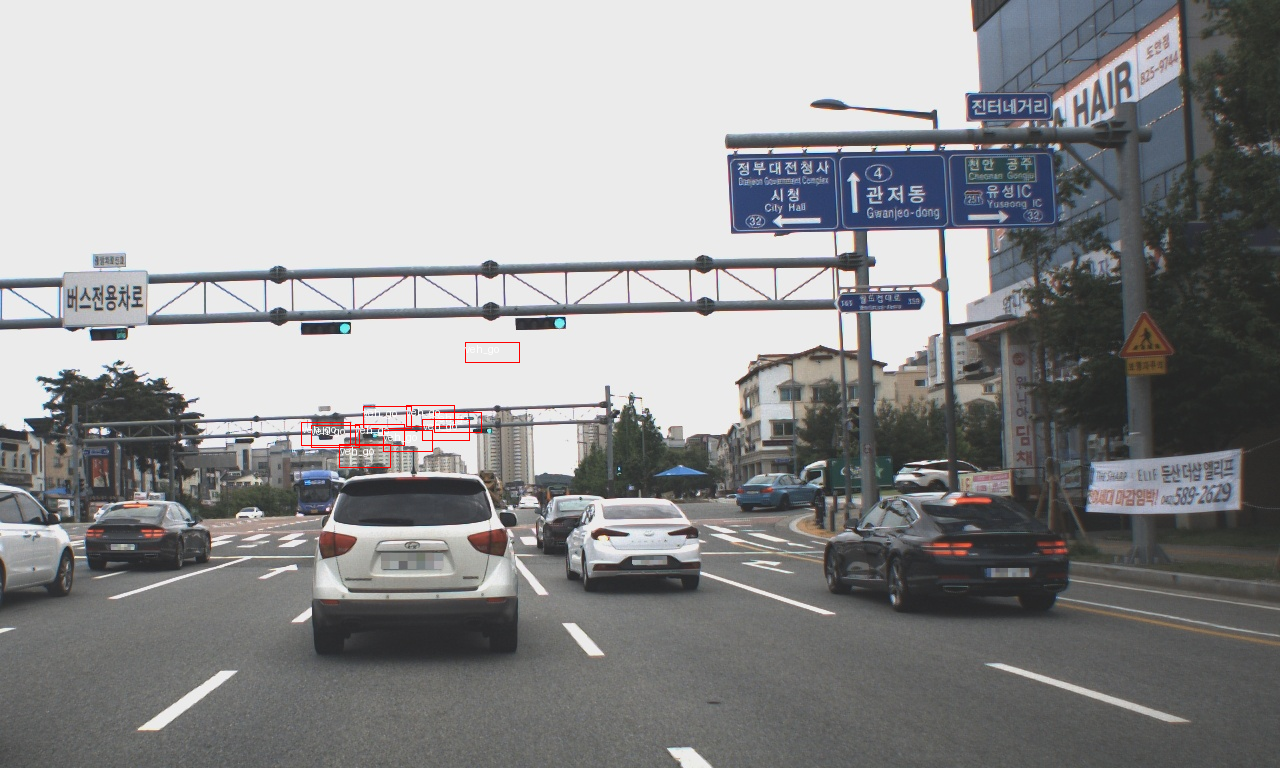

In [13]:
# random visualization
# test_annos = os.listdir(test_anno_path)
# random_num = random.randrange(10000000, 10000000 + len(test_annos))
random_num = '10000008'
test_anno = os.path.join(test_anno_path, f"{random_num}.txt")
sample_img = os.path.join(test_image_path, f"{random_num}.jpg")
print(os.path.basename(sample_img))

img = Image.open(sample_img)
original_w, original_h = img.size
print(original_w, original_h)
draw = ImageDraw.Draw(img)

categories = [
    "veh_go",
    "veh_goLeft",
    "veh_noSign",
    "veh_stop",
    "veh_stopLeft",
    "veh_stopWarning",
    "veh_warning",
    "ped_go",
    "ped_noSign",
    "ped_stop",
    "bus_go",
    "bus_noSign",
    "bus_stop",
    "bus_warning",
]
id2label = {index: x for index, x in enumerate(categories, start=0)}
label2id = {v: k for k, v in id2label.items()}

with open(test_anno, "r") as file:
    for line in file:
        class_id, norm_center_x, norm_center_y, norm_w, norm_h, cs= map(
            float, line.strip().split()
        )
        
        print( norm_center_x, norm_center_y, norm_w, norm_h)
        x_min = (norm_center_x - norm_w / 2) * original_w
        y_min = (norm_center_y - norm_h / 2) * original_h
        x_max = (norm_center_x - norm_w / 2) * original_w + norm_w * original_w
        y_max = (norm_center_y - norm_h / 2) * original_h + norm_h * original_h

        draw.rectangle((x_min, y_min, x_max, y_max), outline="red", width=1)
        draw.text((x_min, y_min), id2label[class_id], fill="white")

img